<a href="https://colab.research.google.com/github/RichardKameri/pydata/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOADING THE DATASET

In [2]:
# Loading the dataset
df = pd.read_csv('/content/Credit card transactions - India - Simple.csv')

In [3]:
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


WORKFLOW

Understanding the data
Datacleaning
Exploratoy data Analysis
Insights


In [4]:
# shape of the data
df.shape

(26052, 7)

In [5]:
# information the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


INSIGHTS

Date column must be datetime datatype

No null values in any column

In [6]:
# details about the dataset
Card_Type = df['Card Type'].unique()
print('Card Types = ', Card_Type)
Exp_Type = df['Exp Type'].unique()
print('Expense Types = ', Exp_Type)
City = len(df['City'].unique())
print('Cities = ', City)

Card Types =  ['Gold' 'Platinum' 'Silver' 'Signature']
Expense Types =  ['Bills' 'Food' 'Entertainment' 'Grocery' 'Fuel' 'Travel']
Cities =  986


In [7]:
# check duplicates
df.duplicated().sum()

0

DATA CLEANING

Object to  Date datatype Conersion


In [8]:
# Object to Date datatype Conversion
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

<ipython-input-8-8e481bae5635>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,0
index,int64
City,object
Date,datetime64[ns]
Card Type,object
Exp Type,object
Gender,object
Amount,int64


EXPLORATORY DATA ANALYSIS

WHICH CARD TYPE IS THE MOST POPULAR


In [9]:
p_card = df['Card Type'].value_counts()
p_card

,count
Card Type,
Silver,6840
Signature,6447
Platinum,6398
Gold,6367


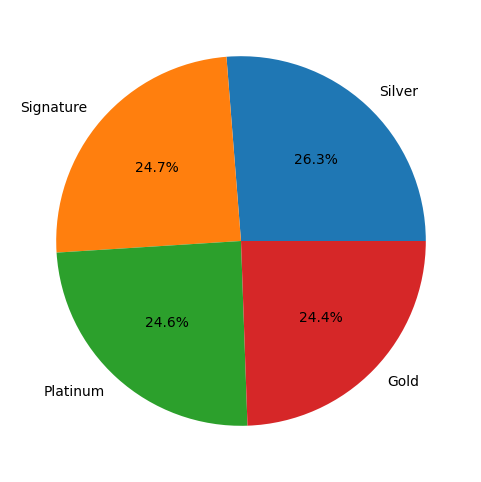

In [10]:
# piechart for card_type
plt.figure(figsize=(6,6))
l=["Silver", "Signature", "Platinum", "Gold"]
plt.pie(p_card, labels=l, autopct='%1.1f%%')
plt.show()

Silver card type is the most popular

The popularity of the Silver card type in the "Credit Card Spending Habits" project could be attributed to several factors:

Affordability: Silver cards often come with lower annual fees and interest rates compared to Gold or Platinum cards, making them more accessible to a wider range of customers.

Rewards and Benefits: Silver cards may offer a balanced mix of rewards and benefits, such as cashback on everyday purchases, travel rewards, and discounts on partner services, which appeal to a broad audience.

Simplicity: These cards typically have straightforward terms and conditions, making them easier for users to understand and manage.

Target Audience: The Silver card might be marketed towards a demographic that values practical benefits over premium services, aligning well with the spending habits and preferences of this group.

WHICH EXPENSE IS THE MOST POPULAR

In [11]:
# Which expense is the most popular
p_exp = df['Exp Type'].value_counts()
p_exp

,count
Exp Type,
Food,5463
Fuel,5257
Bills,5078
Entertainment,4762
Grocery,4754
Travel,738


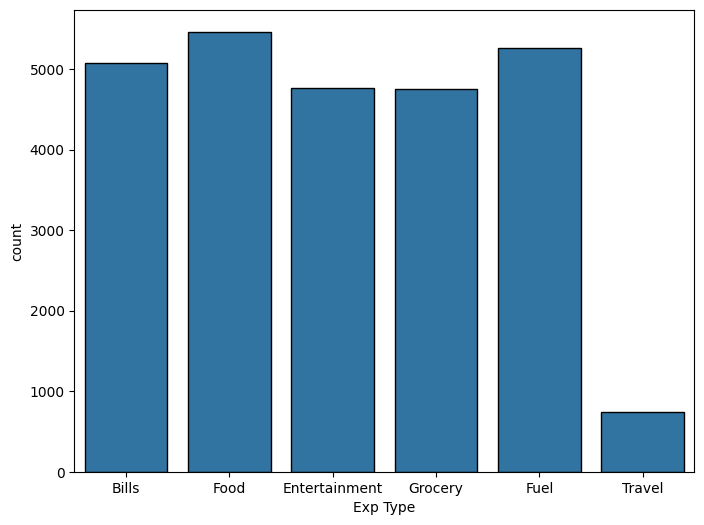

In [12]:
# bar plot for expenses
plt.figure(figsize=(8,6))
sns.countplot(x = "Exp Type", data=df, edgecolor="black")
plt.show()

Food expense is the most popular

ood being the most popular expense in the "Credit Card Spending Habits" project can be attributed to several reasons:

Essential Nature: Food is a basic necessity, and people need to eat regularly, making it a consistent and recurring expense.

Frequency of Purchase: Unlike other expenses that might be occasional, food purchases happen frequently, contributing to its prominence in spending data.

Variety of Spending: Food expenses can include groceries, dining out, takeaways, and more, covering a wide range of spending habits.

Convenience: With the rise of online grocery shopping and food delivery services, it's easier than ever for people to spend on food using credit cards.

Reward Programs: Many credit cards offer rewards or cashback on food purchases, encouraging people to use their cards for these transactions.

WHICH GENDER SPEND MORE IN CREDIT CARD

In [13]:
# Which gender spends more on credit card
df.groupby('Gender')['Amount'].sum()


,Amount
Gender,
F,2205311030
M,1869522343


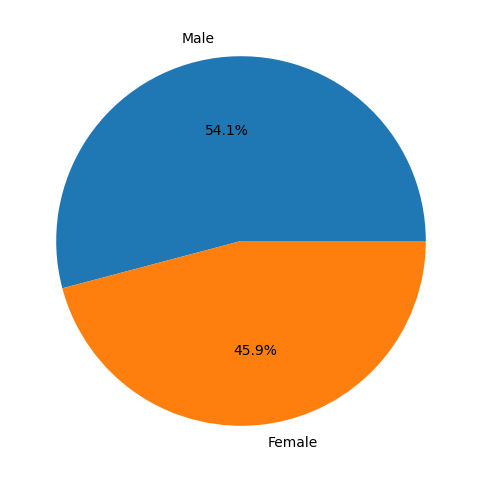

In [14]:
# piechart of spending by gender
plt.figure(figsize=(6,6))
l=["Male", "Female"]
plt.pie(df.groupby('Gender')['Amount'].sum(), labels=l, autopct='%1.1f%%')
plt.show()

Females spends more in credit cards


There are several reasons why females might spend more on credit cards, based on various studies and observations:

Supplementing Income: Women often use credit cards to supplement their income, especially if they earn less than men on average. This can lead to higher credit card usage for everyday expenses1.

Practical Spending: Women tend to view credit cards as an extension of their salary and make more practical purchases. This means they might use credit cards for necessary expenses more frequently1.

Budgeting and Awareness: Women are generally more aware of their finances and better at budgeting. This heightened financial awareness can lead to more strategic use of credit cards to manage cash flow.

Shopping Habits: Studies have shown that women are more likely to engage in online shopping and make impulse purchases, which can increase credit card spending.

Reward Programs: Many credit cards offer rewards and cashback on purchases, which can incentivize higher spending, especially in categories like groceries and household items that women frequently purchase.

WHICH MONTH OF THE YEAR CREDIT CARD USAGE IS THE HIGHEST

In [15]:
# whichmonth of the year credit card usage is highest
df['Date'].dt.month.value_counts()


,count
Date,
1,2722
12,2702
10,2665
3,2622
11,2622
4,2587
5,2436
2,2433
8,1393


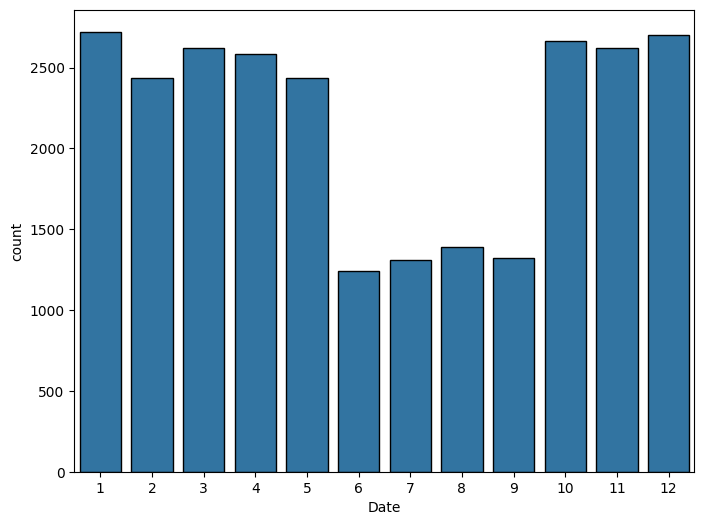

In [16]:
# barplot showing creditcard spending by month
plt.figure(figsize=(8,6))
sns.countplot(x = df['Date'].dt.month, data=df, edgecolor="black")
plt.show()

January is the peak month for credit card usage


January is often a peak month for credit card spending due to several factors:

Post-Holiday Sales: Many retailers offer significant discounts and promotions after the holiday season to clear out inventory, leading consumers to spend more.

Gift Cards and Returns: People often use gift cards received during the holidays and make returns or exchanges, which can result in additional spending.

New Year's Resolutions: Some consumers may start the new year with resolutions to upgrade their lifestyle, leading to increased spending on items like gym memberships, new clothes, or home improvements.

Tax Refunds: Early filers who receive tax refunds may use that extra money to make purchases, contributing to higher spending in January.

Seasonal Changes: The colder weather in many regions can lead to increased spending on utilities, home heating, and winter clothing.

FIND TOP FIVE CITIES IN INDIA WHICH SPEND CREDIT CARD MAX

In [17]:
#FIND TOP FIVE CITIES IN INDIA WHICH SPEND CREDIT CARD MAX
df.groupby('City')['Amount'].sum().sort_values(ascending=False).head()

,Amount
City,
"Greater Mumbai, India",576751476
"Bengaluru, India",572326739
"Ahmedabad, India",567794310
"Delhi, India",556929212
"Kolkata, India",115466943


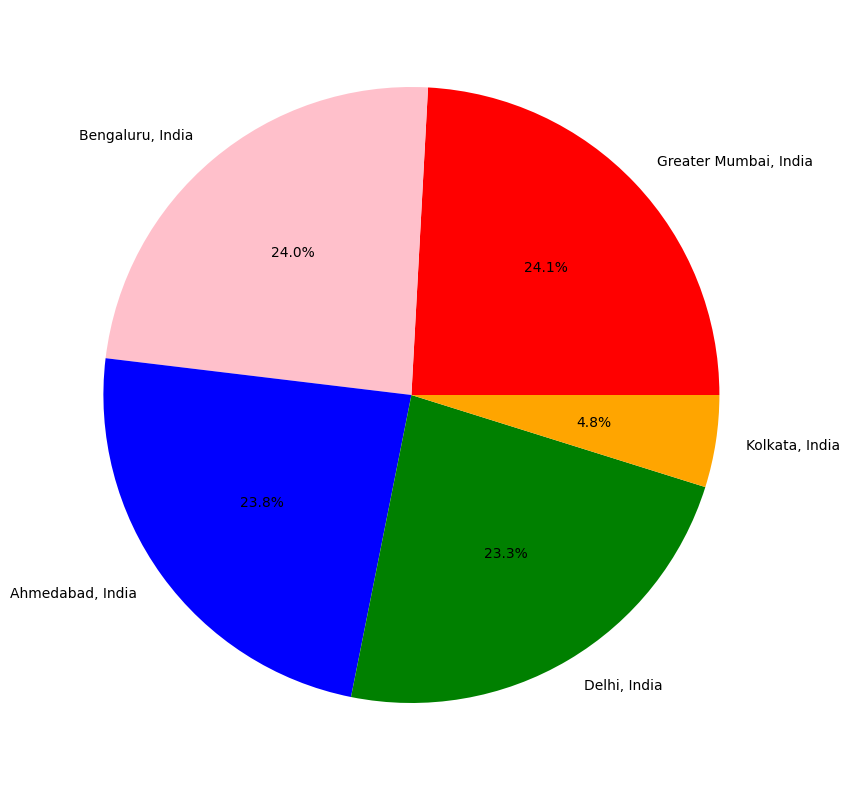

In [18]:
plt.figure(figsize=(10,10))
colors = np.array(["red","pink","blue","green","orange"])
plt.pie(df.groupby('City')['Amount'].sum().sort_values(ascending=False).head(), labels=df.groupby('City')['Amount'].sum().sort_values(ascending=False).head().index, colors=colors, autopct='%1.1f%%')
plt.show()

WHICH CARD TYPE WERE MOSTLY USED BY MALES AND FEMALES

In [19]:
# WHICH CARD TYPE WERE MOSTLY USED BY MALES AND FEMALES
df.groupby(['Gender', 'Card Type'])['Card Type'].count()

Gender  Card Type
F       Gold         3287
        Platinum     3252
        Signature    3368
        Silver       3773
M       Gold         3080
        Platinum     3146
        Signature    3079
        Silver       3067
Name: Card Type, dtype: int64

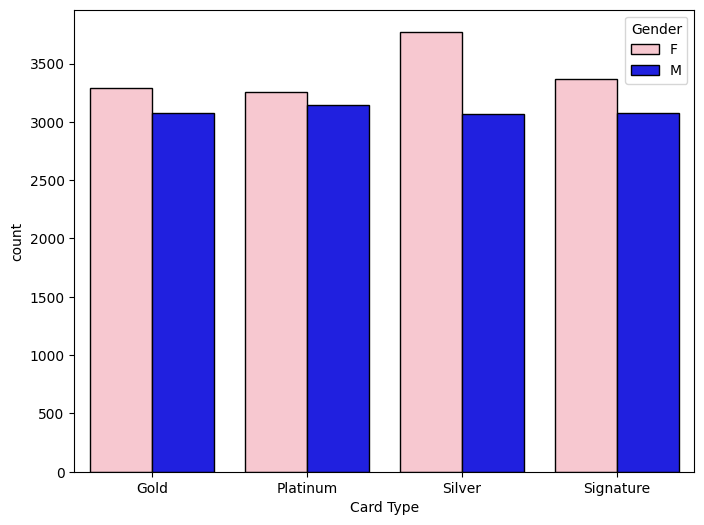

In [20]:
# SHOWING CARD TYPE USED BY MALES AND FEMALES
plt.figure(figsize=(8,6))
sns.countplot(x="Card Type",hue="Gender",data=df,palette=["pink","blue"],edgecolor="black")
plt.show()

females used the Silver card type where as Males have used the platinum card types more.

There are a few reasons why females might prefer Silver card types while males might lean towards Platinum card types:

Cost and Affordability: Silver cards often have lower annual fees and interest rates, making them more affordable and appealing to those who prefer practicality and simplicity in their financial choices. This might be more aligned with the spending habits and financial priorities of females1.

Rewards and Benefits: Platinum cards typically offer more premium rewards and benefits, such as travel perks, higher cashback rates, and exclusive access to lounges. Males might be more inclined to spend on luxury items and travel, making the Platinum card's benefits more attractive to them1.

Spending Habits: Women might use credit cards more for everyday expenses and necessities, while men might use them for larger, more discretionary purchases. This difference in spending behavior can influence the type of card they prefer.

Marketing and Targeting: Credit card companies often market different card types to different demographics. Silver cards might be marketed towards practical, everyday spending, which could resonate more with females, while Platinum cards might be marketed towards luxury and travel, appealing more to males.

FIND OUT THE EXPENSES OF CREDIT CARDS OF MALES AND FEMALES MONTHWISE

In [25]:
# find out the expenses of credit cards of males and females monthwise
print(df.columns)

Index(['index', 'City', 'Date', 'Card Type', 'Exp Type', 'Gender', 'Amount'], dtype='object')


In [27]:
# find out the expenses of credit cards of males and females monthwise
df.groupby(['Gender', 'Date'])['Amount'].sum()

Gender  Date      
F       2013-10-04    5841871
        2013-10-05    4136519
        2013-10-06    3898252
        2013-10-07    4513532
        2013-10-08    4513867
                       ...   
M       2015-05-22    2920921
        2015-05-23    2882248
        2015-05-24    4080126
        2015-05-25    2375093
        2015-05-26    3267478
Name: Amount, Length: 1200, dtype: int64

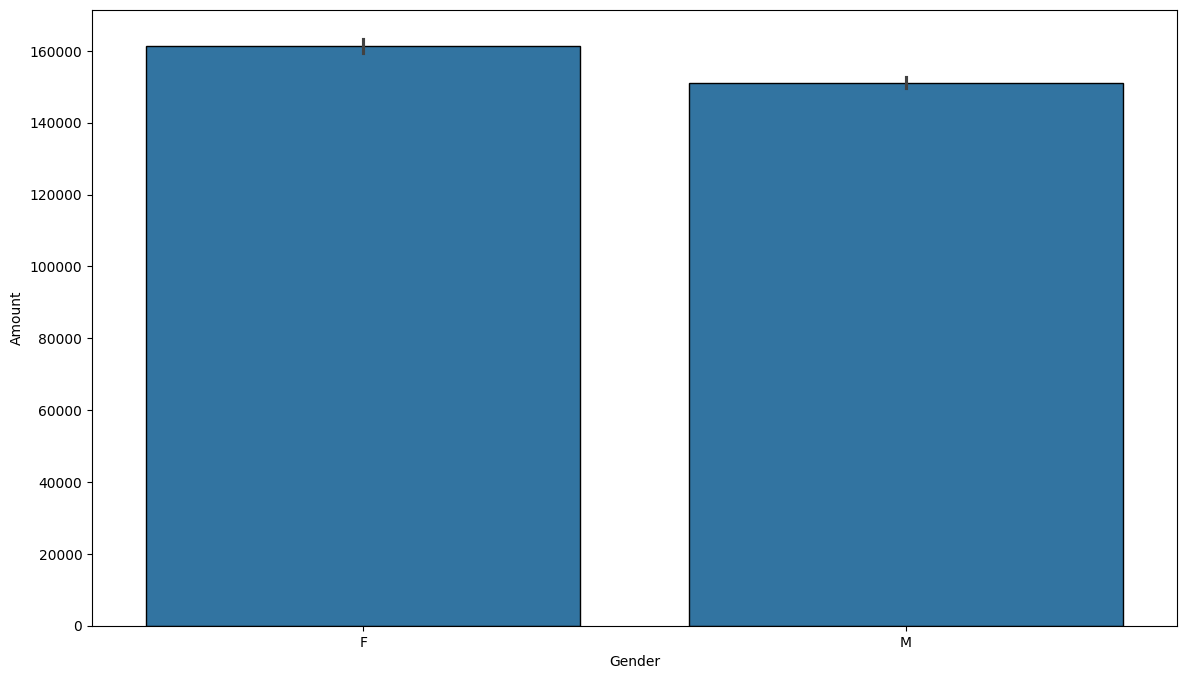

In [22]:
plt.figure(figsize=(14,8))
sns.barplot(x="Gender",y="Amount", data=df,edgecolor="black")
plt.show()

CONCLUSION

Silver was most popular card type .

In Fuel and Food expenses were most counts paid by the cards.

In January and December there is high usage of cards payments.


Bengaluru,Greater Mumbai, Ahmedabad, and Delhi were the Top 4 Cities.

Females used the Silver card type where as Male used the platinum card type more.

Females were more depend on credit cards as they spend more amount on credit cards than men.

Females mostly spend in October and Males in january using credit cards.